[ 65807.10768827  75435.52138371  69658.47316644  61955.7422101
 117800.54164362  54253.01125375 127428.95533905  64844.26631873
 112986.3347959   57141.53536238]
Mean Square error : 48775930.00556399


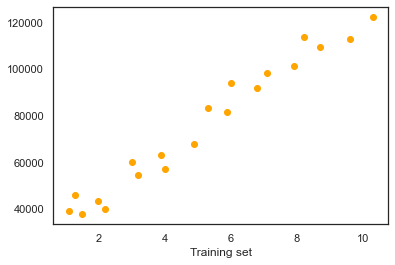

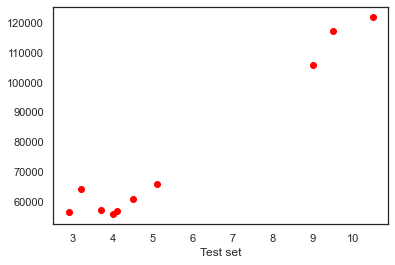

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the datasets
datasets = pd.read_csv('./datasets/Salary_data.csv')
#print(datasets)
X = datasets.iloc[:, :-1].values
Y = datasets.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=1/3)

# Fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

# Predicting the Test set result 
Y_Pred = regressor.predict(X_Test)
print(Y_Pred)

#MeanSquare Error
from sklearn.metrics import mean_squared_error
print("Mean Square error :",mean_squared_error(Y_Test,Y_Pred))

# Visualising the Training set results
import matplotlib.pyplot as plt
plt.scatter(X_Train, Y_Train,color="orange")
plt.xlabel("Training set")
plt.show()
# Visualising the Test set results
plt.scatter(X_Test,Y_Test,color="red")
plt.xlabel("Test set")
plt.show()

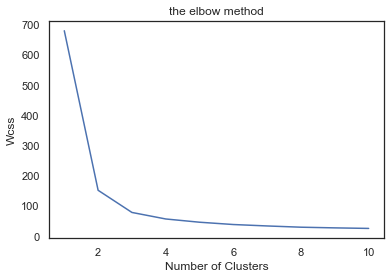

Silhouette_score: 0.5525919445499755


In [64]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

dataset = pd.read_csv('./datasets/Iris.csv')
x = dataset.iloc[:,[1,2,3,4]]
y = dataset.iloc[:,-1]

#Filling null values with mean
dataset = dataset.fillna(dataset.mean())

#elbow method to know the number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print("Silhouette_score:",score)



In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
 
# Read Data from CSV
data = pd.read_csv('./datasets/Iris.csv')
x = dataset.iloc[:,[1,2,3,4]]

#Feature Scaling using StandardScaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_scaled = pd.DataFrame(X_scaled_array, columns = x.columns)

#Applying K-means algorithm
from sklearn.cluster import KMeans
nclusters = 3 
km = KMeans(n_clusters=nclusters)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print("Silhouette_score after feature scaling:",score)

Silhouette_score after feature scaling: 0.46214947389312017
